# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

JORGE ROJAS

In [7]:
pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.5 MB 3.0 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.5 MB 3.9 MB/s eta 0:00:03
   ----------- ---------------------------- 3.4/11.5 MB 4.8 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.5 MB 6.6 MB/s eta 0:00:01
   ------------------------------- -------- 8.9/11.5 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\gboy2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

=== Matriz TF ===
    cama  cómoda  de  debajo  del  el  en  es  escondió  estaba  gato  \
D1     1       0   1       1    0   1   0   0         1       0     1   
D2     1       1   0       0    0   0   0   0         0       1     0   
D3     0       0   0       0    0   3   1   0         0       0     1   
D4     0       0   0       0    1   0   0   1         0       0     0   

    importante  jardín  jugaron  la  limpia  limpieza  perro  se  y  
D1           0       0        0   1       0         0      0   1  0  
D2           0       0        0   1       1         0      0   0  1  
D3           0       1        1   0       0         0      1   0  1  
D4           1       1        0   1       0         1      0   0  0  

=== Matriz TF-IDF ===
       cama   cómoda       de   debajo      del       el       en       es  \
D1  0.30103  0.00000  0.60206  0.60206  0.00000  0.30103  0.00000  0.00000   
D2  0.30103  0.60206  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
D3  0.000

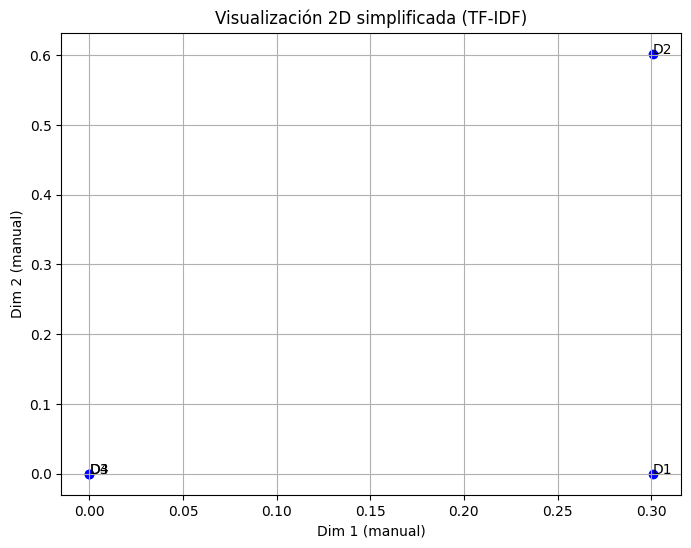

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Corpus de documentos
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# Preprocesamiento básico: minusculas y tokenización
tokenized_docs = [doc.lower().replace('.', '').split() for doc in documents]

# Obtener vocabulario único
vocab = sorted(set(word for doc in tokenized_docs for word in doc))

# === Matriz TF (frecuencia absoluta) ===
tf_data = []
for doc in tokenized_docs:
    row = [doc.count(word) for word in vocab]
    tf_data.append(row)

tf_df = pd.DataFrame(tf_data, columns=vocab, index=["D1", "D2", "D3", "D4"])
print("=== Matriz TF ===")
print(tf_df)

# === Cálculo IDF manual ===
N = len(documents)
idf = []
for word in vocab:
    df = sum(1 for doc in tokenized_docs if word in doc)
    idf_value = math.log10(N / df) if df != 0 else 0
    idf.append(idf_value)

# === Matriz TF-IDF ===
tfidf_data = tf_df.values * idf  # broadcasting
tfidf_df = pd.DataFrame(tfidf_data, columns=vocab, index=["D1", "D2", "D3", "D4"])
print("\n=== Matriz TF-IDF ===")
print(tfidf_df)

# Reducción a 2D usando media como método muy básico
docs_2d = tfidf_df.values[:, :2] 

plt.figure(figsize=(8, 6))
plt.scatter(docs_2d[:, 0], docs_2d[:, 1], color='blue')
for i, label in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(label, (docs_2d[i, 0], docs_2d[i, 1]))
plt.title("Visualización 2D simplificada (TF-IDF)")
plt.xlabel("Dim 1 (manual)")
plt.ylabel("Dim 2 (manual)")
plt.grid(True)
plt.show()


## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.


Similitud con la consulta:
D1: 0.0948
D2: 0.1102
D3: 0.0000
D4: 0.1002


C:\Users\gboy2\AppData\Local\Temp\ipykernel_12748\539669704.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label, (tfidf[vocab[0]][i], tfidf[vocab[1]][i]))


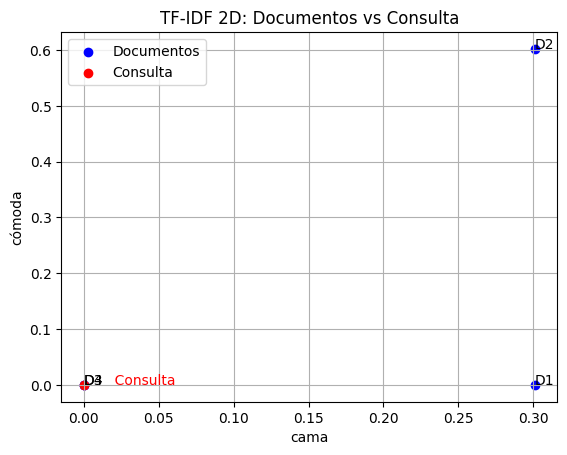

In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Documentos
docs = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

tokenized = [d.lower().replace('.', '').split() for d in docs]
vocab = sorted(set(w for doc in tokenized for w in doc))

tf = pd.DataFrame([[doc.count(w) for w in vocab] for doc in tokenized],
                  columns=vocab, index=["D1", "D2", "D3", "D4"])

N = len(docs)
idf = [math.log10(N / sum(w in doc for doc in tokenized)) for w in vocab]

tfidf = tf * idf

q = input("Consulta: ").lower().replace('.', '').split()
q_vec = pd.Series([q.count(w) * idf[i] for i, w in enumerate(vocab)], index=vocab)

def cos_sim(a, b): return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-10)

print("\nSimilitud con la consulta:")
for i in tfidf.index:
    sim = cos_sim(tfidf.loc[i], q_vec)
    print(f"{i}: {sim:.4f}")

plt.scatter(tfidf[vocab[0]], tfidf[vocab[1]], color='blue', label='Documentos')
plt.scatter(q_vec[vocab[0]], q_vec[vocab[1]], color='red', label='Consulta')
for i, label in enumerate(tfidf.index):
    plt.annotate(label, (tfidf[vocab[0]][i], tfidf[vocab[1]][i]))
plt.annotate("       Consulta", (q_vec[vocab[0]], q_vec[vocab[1]]), color='red')
plt.xlabel(vocab[0])
plt.ylabel(vocab[1])
plt.title("TF-IDF 2D: Documentos vs Consulta")
plt.grid()
plt.legend()
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`


Ranking de documentos por similitud:
D1: 0.3230
D2: 0.1878
D3: 0.1443
D4: 0.0000


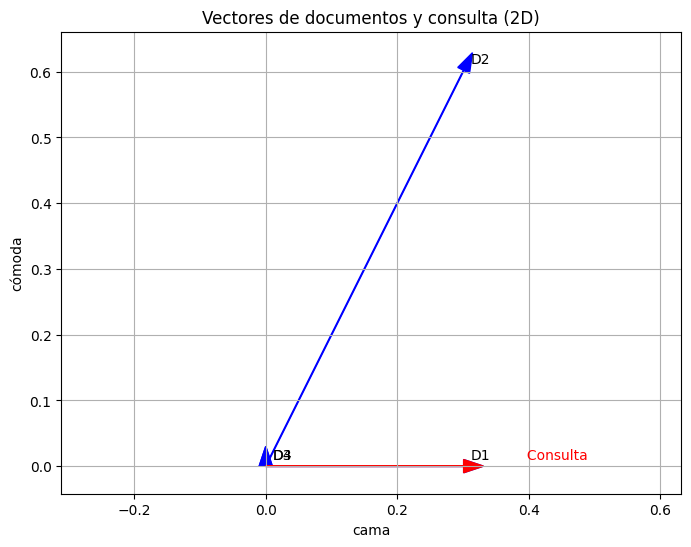

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Documentos
docs = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

tokenized = [d.lower().replace('.', '').split() for d in docs]
vocab = sorted(set(w for doc in tokenized for w in doc))

tf = pd.DataFrame([[doc.count(w) for w in vocab] for doc in tokenized],
                  columns=vocab, index=["D1", "D2", "D3", "D4"])
N = len(docs)
idf = [math.log10(N / sum(w in doc for doc in tokenized)) for w in vocab]
tfidf = tf * idf

def cos_sim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-10)

def consulta_similaridad(query):
    q_tokens = query.lower().replace('.', '').split()
    q_vec = pd.Series([q_tokens.count(w) * idf[i] for i, w in enumerate(vocab)], index=vocab)
    
    similitudes = {doc: cos_sim(tfidf.loc[doc], q_vec) for doc in tfidf.index}
    ranking = sorted(similitudes.items(), key=lambda x: x[1], reverse=True)
    
    print("\nRanking de documentos por similitud:")
    for doc, sim in ranking:
        print(f"{doc}: {sim:.4f}")
    
    return q_vec, ranking

consulta = input("Consulta: ")
q_vec, ranking = consulta_similaridad(consulta)

x_key, y_key = vocab[0], vocab[1]

plt.figure(figsize=(8,6))
for i, doc in enumerate(tfidf.index):
    x = tfidf.loc[doc][x_key]
    y = tfidf.loc[doc][y_key]
    plt.arrow(0, 0, x, y, head_width=0.02, color='blue')
    plt.text(x + 0.01, y + 0.01, doc)

qx = q_vec[x_key]
qy = q_vec[y_key]
plt.arrow(0, 0, qx, qy, head_width=0.02, color='red')
plt.text(qx + 0.01, qy + 0.01, "             Consulta", color='red')

plt.title("Vectores de documentos y consulta (2D)")
plt.xlabel(x_key)
plt.ylabel(y_key)
plt.grid()
plt.axis('equal')
plt.show()


PRACTICA EN CLASE

In [ ]:
vocab =set()
for doc in documents:
    for word in doc.lower().strip('.').split(sep=' '):
        vocab.add(word)
print(len(vocab))

{'jardín', 'la', 'cómoda', 'limpieza', 'importante', 'en', 'cama', 'perro', 'debajo', 'del', 'jugaron', 'de', 'es', 'el', 'escondió', 'y', 'gato', 'se', 'estaba', 'limpia'}


In [45]:
dict_tf = {}
i=0
for doc in documents:
    dict_tfd = {}
    for term in vocab:
        count = doc.lower().strip('.').count(term)
        dict_tfd[term] = count
    #print (doc, dict_tfd)
    dict_tf[doc] = dict_tfd
    i =+ 1
print (dict_tf)

{'El gato se escondió debajo de la cama.': {'jardín': 0, 'la': 1, 'cómoda': 0, 'limpieza': 0, 'importante': 0, 'en': 0, 'cama': 1, 'perro': 0, 'debajo': 1, 'del': 0, 'jugaron': 0, 'de': 2, 'es': 1, 'el': 1, 'escondió': 1, 'y': 0, 'gato': 1, 'se': 1, 'estaba': 0, 'limpia': 0}, 'La cama estaba limpia y cómoda.': {'jardín': 0, 'la': 1, 'cómoda': 1, 'limpieza': 0, 'importante': 0, 'en': 0, 'cama': 1, 'perro': 0, 'debajo': 0, 'del': 0, 'jugaron': 0, 'de': 0, 'es': 1, 'el': 0, 'escondió': 0, 'y': 1, 'gato': 0, 'se': 0, 'estaba': 1, 'limpia': 1}, 'El perro y el gato jugaron en el jardín.': {'jardín': 1, 'la': 0, 'cómoda': 0, 'limpieza': 0, 'importante': 0, 'en': 1, 'cama': 0, 'perro': 1, 'debajo': 0, 'del': 0, 'jugaron': 1, 'de': 0, 'es': 0, 'el': 3, 'escondió': 0, 'y': 1, 'gato': 1, 'se': 0, 'estaba': 0, 'limpia': 0}, 'La limpieza del jardín es importante.': {'jardín': 1, 'la': 1, 'cómoda': 0, 'limpieza': 1, 'importante': 1, 'en': 0, 'cama': 0, 'perro': 0, 'debajo': 0, 'del': 1, 'jugaron': 0

In [50]:
import pandas as pd

matriz = pd.DataFrame(dict_tf)
matriz.T

,jardín,la,cómoda,limpieza,importante,en,cama,perro,debajo,del,jugaron,de,es,el,escondió,y,gato,se,estaba,limpia
El gato se escondió debajo de la cama.,0,1,0,0,0,0,1,0,1,0,0,2,1,1,1,0,1,1,0,0
La cama estaba limpia y cómoda.,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1
El perro y el gato jugaron en el jardín.,1,0,0,0,0,1,0,1,0,0,1,0,0,3,0,1,1,0,0,0
La limpieza del jardín es importante.,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0


In [47]:
matriz.to_csv('matriz.csv', index=True)

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-1.07928449,  1.73739882],
       [-1.35204195, -1.83917526],
       [ 2.79812836, -0.18141402],
       [-0.36680192,  0.28319046]])

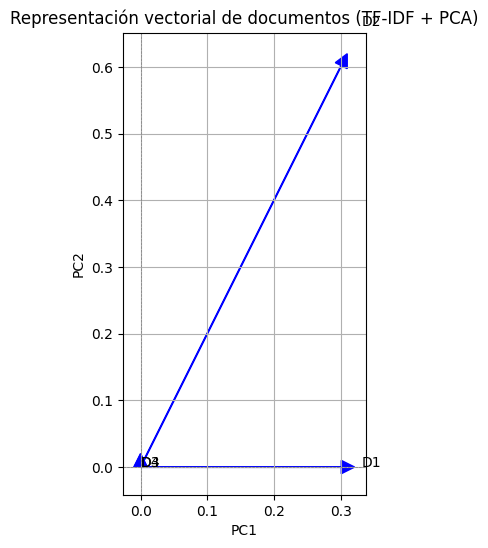

In [17]:
plt.figure(figsize=(10, 6))

for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue')
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

plt.title('Representación vectorial de documentos (TF-IDF + PCA)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
